#1. 데이터 준비
> 본 데이터는 캐글(https://www.kaggle.com/)에서 연습문제로 지원해 주는 데이터이다. 캐글은 2010년 4월에 설립된 공공 및 기업 데이터를 활용한 머신러닝 경진대회 플랫폼이다. 

> 우리가 분석할 내용은 titanic 호에서 생존한 사람들에 대해 분석해 보려 한다.
##1.1 데이터 열기
> 구글 드라이브에 데이터를 업로드한 후 읽어들여 보자

In [4]:
import pandas as pd

df = pd.read_csv('data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##1.2. 데이터 백업
> 데이터를 분석하다 보면 여러 가공과정을 거치면서 원본 데이터가 손실될 수 있다. 다양한 방법으로 분석하다 보면 원본을 다시 가져다 사용하는 경우가 빈번하다. 데이터를 백업함으로써 원본 데이터를 유지할 수 있다.

In [5]:
df_titanic_backup = df.copy()

file_backup = 'data/titanic_backup.csv'
df.to_csv(file_backup, index=False)

#2. 데이터 보기
##2.1 데이터의 기본 정보 확인
>info함수를 이용하여 데이터의 기본 정보를 확인할 수 있다.

In [7]:
df_titanic_backup = pd.read_csv(file_backup)
df_titanic_backup

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df_titanic_backup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* 위의 정보를 통해 총 12개의 열이 존재하며 총 891개의 행(고객정보)이 존재한다.
* age, cabin, embarked의 데이터 개수가 891개가 안되는 것으로 누락된 데이터가 존재하는 것을 알 수 있다.

##2.2 기초 통계 정보 확인
> 기초 통계 정보를 확인하여 추후 어떠한 방향으로 데이터를 분석할지 생각해 본다.

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* passengerId는 승객번호로 총 891개가 존재하며 총 승객수와 일치함으로 결측치는 없는 것으로 볼 수 있다. 또한 표준편차가 257로 높게 나타나 데이터의 분포가 평균값과 멀게 분포된 것을 볼 수 있고 최소값이 1이며 최대값이 891인 것으로 보아 순차적으로 퍼진 데이터 인 것을 알 수 있다.
* Survived는 생존여부이며 0은 사망, 1을 생존으로 처리하였다. 총 891개가 존재하며 최소값이 0이고 최대값이 1이며 사분위수에 0과1이외의 데이터가 없는 것으로 보아 0, 1로만 데이터가 이루어 진것을 알 수 있다. 또한 평균이 0.383838인 것으로 1의 개수가 38%정도인 것을 알 수 있다. 즉, 생존율이 38%인 것을 알 수 있다.
* Pclass는 객실 등급으로 891개의 데이터가 존재하여 결측치는 없는 것을 알 수 있다. 사분위수의 값으로 1,2,3의 데이터 집합인 것을 알 수 있고 평균이 2, 3인것으로 1보다는 2와 3의 수들이 더 많이 나타나는 것을 알 수 있다. 중위수가 3인 것으로 가장 많이 수는 3인 것을 알 수 있다. 즉, 3등급 자리가 가장 많으며 1등급 자리가 가장 적은 것을 알 수 있다.
* age는 나이로 714개가 존재하며 결측치가 발생한 것을 알 수 있다. 사분위수를 확인해 보면 25%가 20.125 50%가 28로 20대가 많을 것으로 예상되며 최소값이 0.42로 나타난 것은 나이 판단 시 영아들은 생후 몇개월 형식으로 표현한 것을 예측할 수 있다.이를 확인하기 위해 2세 미만의 아이들을 확인해 보면 1세에는 소수점 이하 수치가 0으로 나타나지만 1세 미만인 경우 소수점 이하 수치가 나타나는 것을 볼 수 있다. 평균이 29.70이고 표준 편차가 14.53인 것을 보아 다양한 연령대가 탑승한 것을 알 수 있다.
* SibSp는 동승자 중 형자나 배우자를 의미하는 것으로 평균과 사분위수로 혼자탄 인원이 많은 것을 알 수 있다.
* Parch는 동승자 중 부모, 혹은 아이의 수를 의미하며 사분위수와 평균으로 혼자 탄 인원이 많은 것을 알 수 있다.
* Fare는 탑승 요금을 의미하며 최소값이 0원인 것을 보면 초청장이 발행되었다는 것을 알 수 있다. 또한 사분위수로 3등급 자리는 10달러 내외정도 생각할 수 있다.

> 이처럼 각 데이터로 다양한 것을 알 수 있다.

##2.3 데이터 확인

In [10]:
df_titanic_backup.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_titanic_backup.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


> head와 tail을 통해 데이터들이 어떻게 분포되어 있는지 알 수 있다.

##2.4 정렬

In [13]:
df_sorted = df.sort_values(by='Fare', axis=0, ascending=False)
df_sorted

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S


> Fare 순으로 정렬해 보니 3좌석을 예약할 경우 가격이 올라간 것을 알 수 있다.

In [14]:
df_titanic_backup.sort_index(axis=1)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0,211536
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1,112053
888,NaN,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0,W./C. 6607
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1,111369


#3. 데이터 클린징
##3.1 결측치 확인
>다음과 같이 count함수를 이용하여 결측치가 발생한 열을 확인할 수 있다. 확인 결과 Age, Cabin(객실번호), Embarked(탑승 항구)인 것을 알 수 있었다.

In [15]:
df_titanic_backup.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

>마찬가지로 isnull().sum()을 이용하여 결측치 총 합을 구할 수 있다.

In [16]:
df_titanic_backup.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##3.2 결측치 시각화
###3.2.1 heatmap
> heatmap은 데이터의 분포상태를 표현하는 시각화 도구이다. heatmap는 두 개의 카테고리 정보를 한눈에 알아 볼 수 있다는 장점이 있다.

<Axes: >

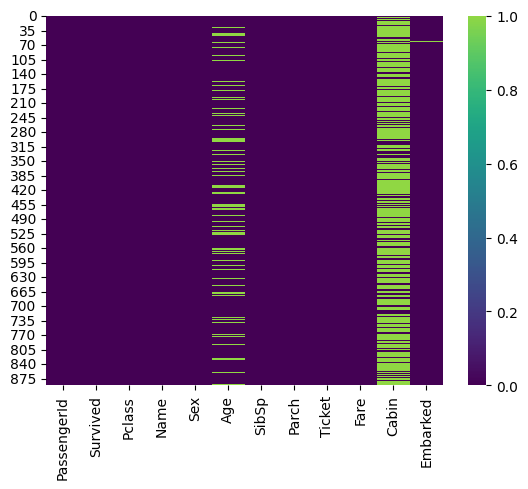

In [26]:
import seaborn as sns

sns.heatmap(df.isnull(),center=0.6,cmap='viridis')

> 기본 정보는 위와 같이 나타난다. 결측치가 나타난 부분은 흰색으로 표시된다.

>cbar 옵션은 colorbar를 의미하는 것으로 기존 그래프에서 나타났던 왼쪽 기준표이며 cbar=False로 지정하게 되면 왼쪽 기준표를 숨길 수 있다.

>center 옵션은 기준 위치를 지정하는 것으로 기준값보다 높으면 붉은색 계열로 기준값보다 낮으면 파란색 계열로 표시한다. 이는 heatmap이 온도를 표현한 그래프이기 때문에 그렇다. 기준이 되는 center는 검정색으로 나타난다.

>linewidths는 각 데이터를 선으로 구분짓기 위해 사용하는 옵션으로 현재는 데이터가 너무 많아 수치를 작게 표현했다.

> 그 이외에도 여러 옵션이 있으며 다음 사이트를 참고하기 바란다.
* https://dsbook.tistory.com/51

###3.2.2 missingno
>위키 백과를 확인하면 아래와 같이 정의되어 있다.
* https://ko.wikipedia.org/wiki/%EB%AF%B8%EC%8B%B1%EB%85%B8

>미싱노(영어: MissingNo. 또는 MissingNO[1], 일본어: けつばん 케츠반[*])는 닌텐도의 《포켓몬스터 적·녹》에서 발견되었던 버그(glitch) 포켓몬이다. “결번(Missing Number)”을 의미하는 미싱노는 개발자인 게임 프리크가 에러 핸들러로 이용한 것으로, 존재하지 않는 포켓몬[2]의 데이터에 접근을 시도할 경우 나타난다. 프로그램된 세 개의 이벤트가 연속 실행되면 일종의 버그로서 미싱노를 만날 수 있게 된다. 닌텐도가 처음으로 미싱노를 공식적으로 언급한 것은 《닌텐도 파워》 1999년 5월호를 통해서였다.

> 미싱노가 나타나면 그래픽 에러가 나타나거나 플레이어의 아이템 메뉴 상의 여섯 번째 아이템이 다중 복제된다. 미싱노는 전략 가이드와 게임 매거진에서 소개되었으며, IGN에서 가장 유명한 게임 버그의 하나로 다룬 바 있다. 포켓몬 적·녹 시리즈의 팬들은 미싱노를 게임 카논(설정)의 일부로서 합리화하려 했으며, 이러한 소프트웨어 에러의 창의적 활용은 사회학자들의 연구 대상이 되기도 했다.[3]

<Axes: >

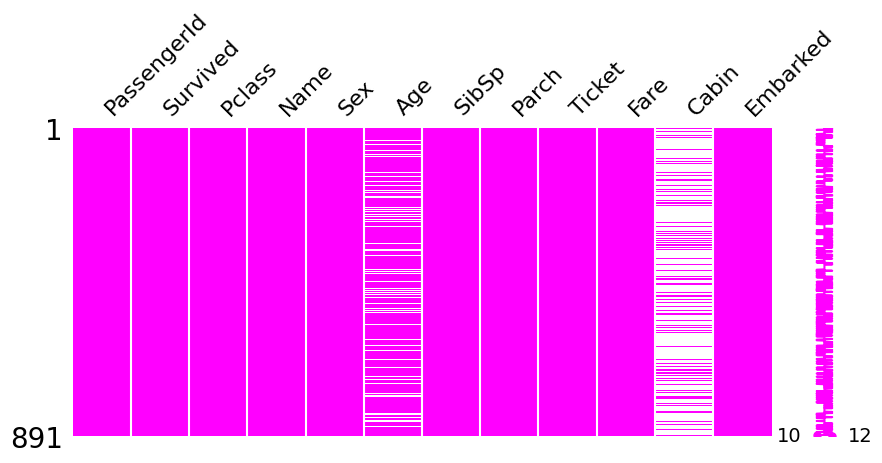

In [29]:
import missingno as msno

msno.matrix(df, figsize=(10, 4), color=(1, 0, 1))

>위와 같이 heatmap과 비슷한 결과를 얻을 수 있다.
* figsize : x, y의 크기를 지정하여 그래프를 표현한다.
* color : RGB로 표현되며 0~1사이의 값을 입력할 수 있다.

<Axes: >

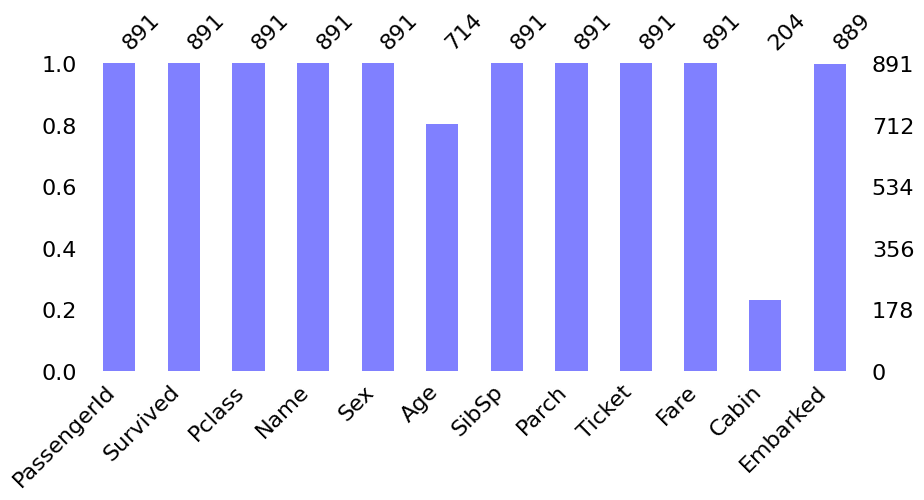

In [30]:
msno.bar(df, figsize=(10, 4), color=(0.5, 0.5, 1))

> 위와 같이 막대바를 이용하여 결측치를 확인할 수 있다.

<Axes: >

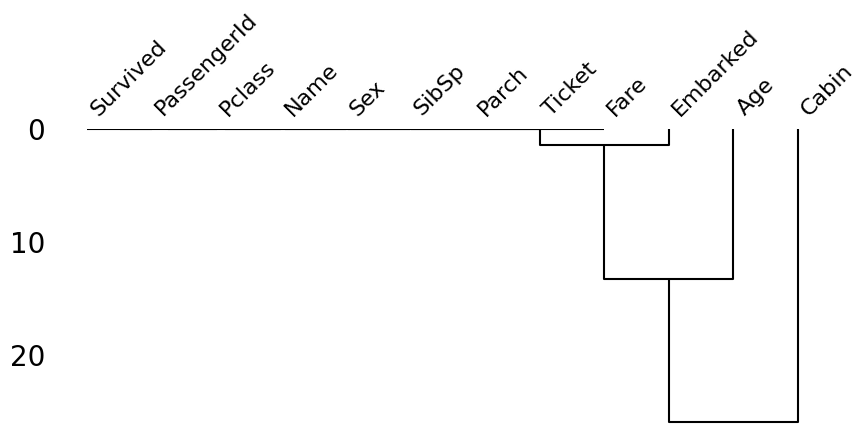

In [31]:
msno.dendrogram(df, figsize=(10, 4))

> dendrogram은 계층적 클러스터링 알고리즘을 활용한 누락 데이터 시작화 방법이다.

###3.2.3 결측치 제거
> 가장 결측치가 많이 발생한 객실번호(Cabin)을 처리해 보자. 사실 객실번호가 분석에 큰 영향을 주지 않기 때문에 제거하면 그만이다. 하지만 최대한 살릴 수 있는 데이터가 존재한다면 살려서 사용해야 한다.

>결측치를 대체하는 방법은 다음과 같다.
* 평균값
* 중간값
* 최빈값

> 현재 결측치가 발생한 값은 객실번호이며 방을 101.3호실과 같은 방법으로 표현하는 것이 아니기 때문에 평균은 사용할 수 없다.
또한 방에 들어갈 수 있는 인원은 제한 적이기 때문에 중간값이나 최빈값 역시 사용할 수 없다.

In [32]:
df_dropna = df.dropna()
df_dropna

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


>dropna은 na가 포함된 모든 행을 제거한다. 이는 axis의 기본값이 0이기 때문이다.

In [33]:
df_dropna_col = df.dropna(axis=1)
df_dropna_col

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


>우리가 제거하려고 하는것은 'Cabin' 열을 제거하려한다. 따라서 위오 같이 axis를 1로 지정해야 한다. 하지만 이렇게만 지정하면 모든 na가 포함된 열을 지우게 된다.

In [36]:
import numpy as np
df_nan = df
# df_nan_dropna = df_nan.dropna(how='all')
df_nan_dropna = df_nan.dropna(how='any', axis=1)
df_nan_dropna

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


>dropna에서 how 옵션은 nan의 포함상태가 일부(any)이냐 모두(all)이냐에 따라 제거한다. 이를 테스트하기 위해 간단하게 nan 정보를 입력했다.

> how의 기본값은 any이므로 all로 지정하여 테스트하면 행 또는 열이 제거 되는 것을 볼 수 있다.

In [37]:
cabin_count = df['Cabin'].notnull().sum()
cabin_count

np.int64(204)

<Axes: >

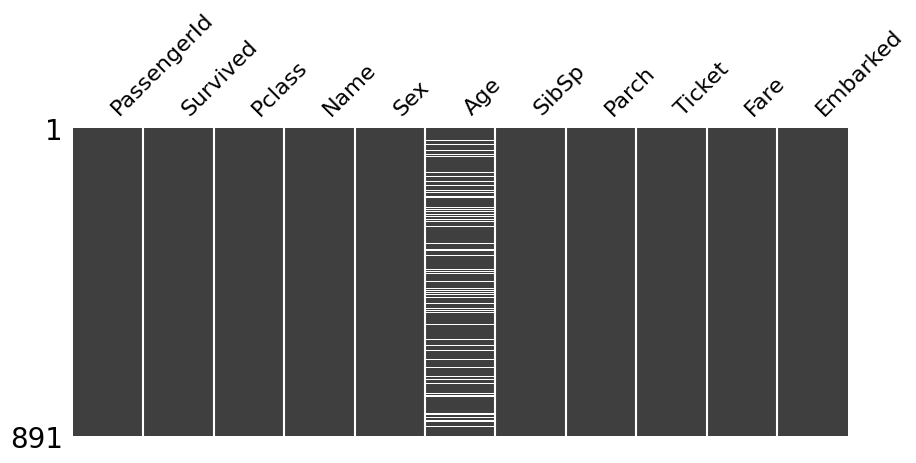

In [40]:
df_dropna_thresh = df.dropna(thresh=cabin_count+1, axis=1)
msno.matrix(df_dropna_thresh, figsize=(10, 4), sparkline=False)

>dropna에서 thresh는 정상치의 최소 개수를 의미한다. 따라서 Cabin의 정상치 개수 + 1을 구하여 thresh에 전달하면 최소 정상치에 못 미침으로 제거되는 것을 볼 수 있다.

###3.2.4 결측치 치환
>이번에는 결측치의 치환에 대해 알아보자. 결측치 치환 시 다음과 같은 방법들을 적용할 수 있다.
* 연관성 찾기
* 대표값 찾기

In [41]:
df_dropna_thresh[df_dropna_thresh['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


####3.2.4.1 탑승 항구(Embarked)

In [44]:
df_dropna_thresh[df_dropna_thresh['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


>위의 코드처럼 결측치가 나타난 부분을 확인해 봤더니 61번과 829번에 결측치가 발생했다. 순차적인 데이터를 확인했을때 61번과 829번은 차이가 많이남으로 각 데이터의 아래 위 10단위로 데이터를 출력해 보자

> 출력 결과 Embarked의 값이 정렬되지 않을 것을 알 수 있다. 이것으로 앞뒤 번호를 기준으로 Embarked를 대체할 수 없다는 것을 알 수 있다.

In [42]:
df_dropna_thresh[820:840]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.00,1,1,12749,93.5000,S
821,822,1,3,"Lulic, Mr. Nikola",male,27.00,0,0,315098,8.6625,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.00,0,0,19972,0.0000,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.00,0,1,392096,12.4750,S
824,825,0,3,"Panula, Master. Urho Abraham",male,2.00,4,1,3101295,39.6875,S
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,Q
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,S
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,C
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,Q
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,NaN


In [45]:
df_dropna_thresh[df_dropna_thresh['Ticket'] == '113571']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [47]:
df_dropna_thresh[df_dropna_thresh['Ticket'] == '113573']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


>dtypes를 이용하여 각 객체별 자료형을 확인해 보면 ticket은 object인 것을 알 수 있다. 따라서 문자열 비교를 통해 데이터를 얻을 수 있다. 

> 이렇게 확인해 보니 결측치가 발생한 두 명의 정보만 나타나는 것을 알 수 있다. 따라서 이 정보로는 치환이 불가능 하다.

In [48]:
df_dropna_thresh[df_dropna_thresh['Fare'] == 80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


>마찬가지로 Fare의 자료형을 확인한 후 비교해 보면 이 역시 두 명의 정보만 나타나서 이를 이용한 치환이 불가능 하다는 것을 판단할 수 있다.

> 이런 경우 데이터의 특성을 기준으로 대표값을 설정할 수 있다. Embarked는 탑승 항구의 정보로 평균이나 중간값을 이용할 수는 없다. 가장 많이 탑승한 항구에서 탑승했다고 가정하기 위해 최빈값을 이용해 보자

In [49]:
df_dropna_thresh['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [50]:
df_dropna_thresh.loc[:, 'Embarked'] = df_dropna_thresh['Embarked'].fillna('S')
df_dropna_thresh.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

<Axes: >

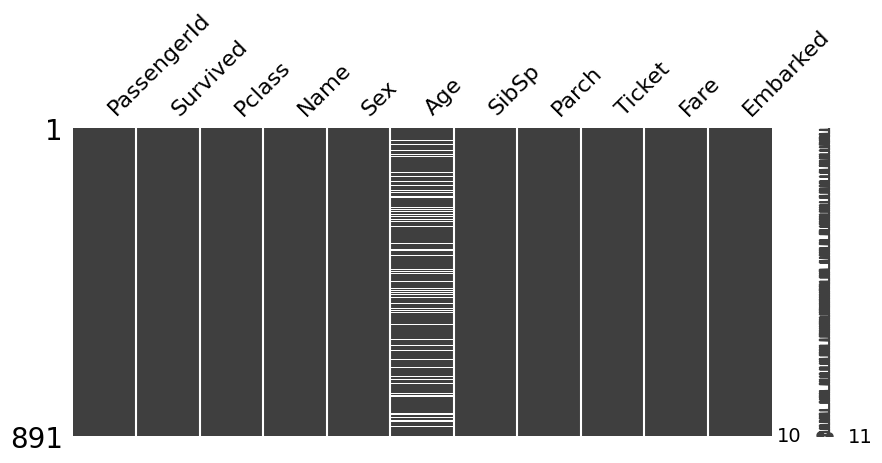

In [51]:
msno.matrix(df_dropna_thresh, figsize=(10, 4))

> vaule_counts 함수를 이용하면 종류별로 빈도수를 알아 볼 수 있다. 실행결과 S가 가장 많이 나타났음으로 결측치 부분을 S로 채운다. 

>실행 결과 결측치는 isnull().sum()이 0으로 나타난 것을 볼 수 있으며 그래프 역시 결측치가 사라진 것을 볼 수 있다.

In [52]:
df_embarked = pd.DataFrame(df_dropna_thresh['Embarked'].value_counts())
df_embarked['idx'] = df_embarked.index
df_embarked[df_embarked == df_embarked.max()]['idx']

Embarked
S      S
C    NaN
Q    NaN
Name: idx, dtype: object

최빈값을 자동화 하고자 한다면 위와 같이 처리할 수도 있다.

####3.2.4.2 나이(Age)
> 나이는 연관성을 확인하는 것이 어려움으로 단순하게 평균을 이용하여 결측치를 치환해 보자

<Axes: >

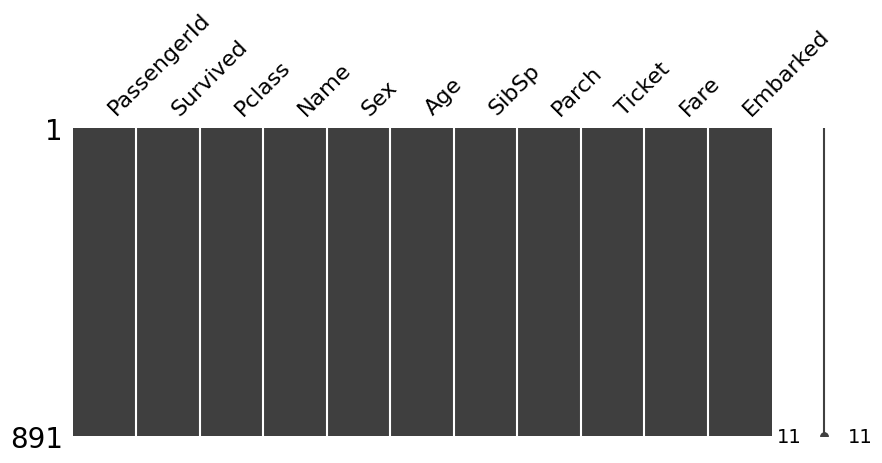

In [53]:
age_mean = df_dropna_thresh['Age'].mean()
df_dropna_thresh.loc[:, 'Age'] = df_dropna_thresh['Age'].fillna(age_mean)
msno.matrix(df_dropna_thresh, figsize=(10, 4))

> 이와 같이 상황에 따라 다양한 방법으로 데이터를 클린징 할 수 있다.

> 마지막으로 지금까지 진행된 내용을 파일로 저장해 두자